In [248]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno
import datetime
import re
from collections import Counter
from scipy.stats import ttest_ind


In [249]:
#IMPORT DATASETS
customer_data=pd.read_csv("QVI_purchase_behaviour.csv")
#Left join  transaction data with customer behaviour data
all_data=pd.read_csv("QVI_details.csv")
all_data.head(7)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43359          1            1002       2        58   
2  43531          1            1003       3        52   
3  43532          1            1003       4       106   
4  43406          1            1004       5        96   
5  43462          1            1005       6        86   
6  43438          1            1007       7        49   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1     Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2     Grain Waves Sour    Cream&Chives 210G         1        3.6   
3    Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4            WW Original Stacked Chips 160g         1        1.9   
5                        Cheetos Puffs 165g         1        2.8   
6  Infuzions SourCream&Herbs Veg Strws 110g         1        3.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1   YOUNG SINGLES/COUPLES       Mainstream  
2          YOUNG FAMILIES           Budget  
3          YOUNG FAMILIES           Budget  
4   OLDER SINGLES/COUPLES       Mainstream  
5  MIDAGE SINGLES/COUPLES       Mainstream  
6   YOUNG SINGLES/COUPLES           Budget

In [250]:
#DESCRIPTIVE ANALYSIS
#checking nulls
all_data.isnull().any().any()

False

<AxesSubplot:>

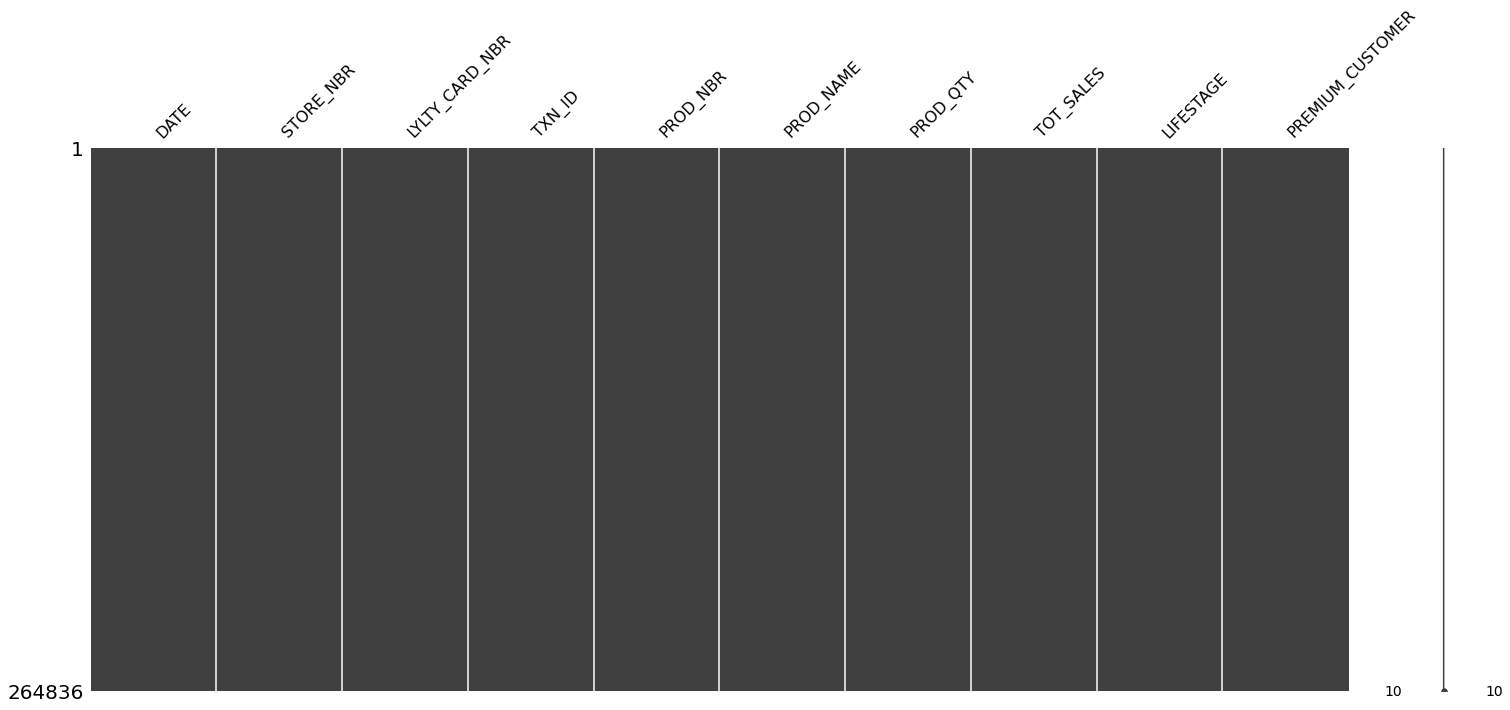

In [251]:
#VISUALIZE Missing rows ifany
missingno.matrix(all_data)


THE DATA IS ALREADY CLEANED

In [252]:
#checking duplicates
all_data.duplicated().any()

True

THERE ARE DUPLICATES

In [253]:
#count the duplicates
all_data.duplicated().sum()

1

In [254]:
all_data[all_data.duplicated(keep=False)]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
106247  43374        107          107024  108462        45   
106249  43374        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  \
106247  Smiths Thinly Cut   Roast Chicken 175g         2        6.0   
106249  Smiths Thinly Cut   Roast Chicken 175g         2        6.0   

                    LIFESTAGE PREMIUM_CUSTOMER  
106247  OLDER SINGLES/COUPLES          Premium  
106249  OLDER SINGLES/COUPLES          Premium

In [255]:
#drop the duplicates
all_data.drop_duplicates(inplace=True)

In [256]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 19.2+ MB


In [257]:
#DATA PREPARATION BY EACH COLUMN
columns=all_data.columns
columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [258]:
#DATE
##DATE feature should be "data" dtype and not "int64"
all_data["DATE"]

0         43390
1         43359
2         43531
3         43532
4         43406
          ...  
264831    43442
264832    43374
264833    43397
264834    43400
264835    43448
Name: DATE, Length: 264835, dtype: int64

In [259]:
all_data.DATE.describe()

count    264835.000000
mean      43464.036600
std         105.389336
min       43282.000000
25%       43373.000000
50%       43464.000000
75%       43555.000000
max       43646.000000
Name: DATE, dtype: float64

* THEY ARE IN THE FORM OF TIME DELTA 
* THE ANCHOR DATE IS 01/01/1900

In [260]:
#PROD_NAME
all_data["PROD_NAME"].sample(10)

170615              Woolworths Medium   Salsa 300g
116845    Infuzions Thai SweetChili PotatoMix 110g
95123                     RRD Pc Sea Salt     165g
45376             RRD Honey Soy       Chicken 165g
157717     Doritos Corn Chip Mexican Jalapeno 150g
60290     Old El Paso Salsa   Dip Tomato Mild 300g
169356                          Kettle Chilli 175g
71098            Tostitos Smoked     Chipotle 175g
55972     Infuzions Thai SweetChili PotatoMix 110g
161129     Smiths Crinkle Cut  Chips Original 170g
Name: PROD_NAME, dtype: object

In [261]:
#HOW MANY ROWS IN THE DATA SET ARE ABOUT SALSA
all_data[all_data["PROD_NAME"].str.contains("Salsa")].shape

(18094, 10)

In [262]:
#MOST FREQUENT WORDS IN PROD_NAME COLUMN

#remove product conderning salsa
list_of_words=all_data.drop(all_data[all_data["PROD_NAME"].str.contains("Salsa")].index,axis=0)["PROD_NAME"]
#remove weight of products
list_of_words=list_of_words.apply(lambda x: re.sub("\d\w*",' ',x))

#remove special characters
list_of_words=list_of_words.apply(lambda x: re.sub('[&/]',' ',x))

bag_of_words=' '.join(list_of_words)
bag_of_words

'Natural Chip        Compny SeaSalt  Red Rock Deli Chikn Garlic Aioli   Grain Waves Sour    Cream Chives   Natural ChipCo      Hony Soy Chckn  WW Original Stacked Chips   Cheetos Puffs   Infuzions SourCream Herbs Veg Strws   RRD SR Slow Rst     Pork Belly   Doritos Cheese      Supreme   Doritos Mexicana      GrnWves Plus Btroot   Chilli Jam   Infuzions SourCream Herbs Veg Strws   Smiths Crinkle Cut  Chips Barbecue   Doritos Cheese      Supreme   Kettle Sensations   Camembert   Fig   Doritos Corn Chip Southern Chicken   CCs Tasty Cheese      Tostitos Splash Of  Lime   Kettle   Swt Pot Sea Salt Kettle Sensations   Camembert   Fig   RRD Salt   Vinegar    Infuzions Mango     Chutny Papadums   GrnWves Plus Btroot   Chilli Jam   Smiths Crinkle Cut  Snag Sauce   Smiths Crinkle      Original   GrnWves Plus Btroot   Chilli Jam   Kettle Sensations   Camembert   Fig   RRD Sweet Chilli    Sour Cream   Natural Chip        Compny SeaSalt  Smiths Chip Thinly  S Cream Onion   CCs Tasty Cheese      Inf

In [263]:
count_dict=Counter(bag_of_words.split())
from heapq import nlargest
#10 most frequent words in original features
most_freq_words=nlargest(10,count_dict,key=lambda x: count_dict[x])




In [264]:
#create dataframe describing 10 most frequent word in transaction data sets
from operator import itemgetter
freq_words_df=pd.DataFrame([nlargest(10,count_dict,key=lambda x: count_dict[x]),itemgetter(*most_freq_words)(count_dict)]) 
freq_words_df=freq_words_df.T
freq_words_df.columns=["Words","Frequency"]
freq_words_df

Words Frequency
0     Chips     49770
1    Kettle     41288
2      Salt     27976
3    Cheese     27890
4    Smiths     27389
5  Pringles     25102
6   Crinkle     22490
7      Corn     22063
8   Doritos     22041
9  Original     21560

* CAN CREATE A NEW FEATURE CALLED WEIGHT OR SIZE OF PRODUCT
* REMOVE SPECIAL CHARACTERS LIKE "&" and "/" ORIGINAL FEATURE CONTAINS 
* REOMOVE THE PRODUCT WEIGHT FROM THE ORIGINAL FEATURE
* REOMVE THE PRODUCT CONTAINING SALSA (ACCORDING TO SAMPLE DATA)


In [265]:
#PROD_QTY

#check for outliers
all_data["PROD_QTY"].value_counts()

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

200 seems a big outliers for the data

In [266]:
all_data["PROD_QTY"].describe()

count    264835.000000
mean          1.907308
std           0.643655
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [267]:
#moniter closely
filter=all_data["PROD_QTY"]==200
all_data[filter]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
221625  43331        226          226000  226201         4   
221626  43605        226          226000  226210         4   

                               PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
221625  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
221626  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

       PREMIUM_CUSTOMER  
221625          Premium  
221626          Premium

221625 and 221626 are the row number of the outliers

In [268]:

#create function to create pipeline for the data frame
def date_prepare(df:pd.DataFrame):

    anchor_date=datetime.datetime(1900,1,1)
    converted_datetime=[]
    for serialdate in list(df["DATE"]):
        if serialdate<60:
            delta_in_days=datetime.timedelta(days=(serialdate-1))
        else:
            delta_in_days=datetime.timedelta(days=(serialdate-2))
        converted_datetime.append(anchor_date+delta_in_days)
    df["DATE"]=converted_datetime
    return df 


def PROD_PREPARE(df:pd.DataFrame):
    #remove rows contaings Salsa
    df=df.drop(df[df["PROD_NAME"].str.contains("Salsa")].index,axis=0)

    #remove special features
    df["PROD_NAME"]=df["PROD_NAME"].apply(lambda x: re.sub('[&/]',' ',x))


    #create new featrue SIZE_PRODUCT and reomve weight of product in original feature
    df["SIZE_PROD"]=df["PROD_NAME"].str.extract("(\d+)")
    df["SIZE_PROD"]=pd.to_numeric(df["SIZE_PROD"])

    df["PROD_NAME"]=df["PROD_NAME"].apply(lambda x: re.sub('\d\w*',' ',x))
    return df

def PROD_QTY_prepare(df:pd.DataFrame):
    #remove outliers
    df=df.drop([221625,221626])
    
    return df


In [269]:
#data cleaning using pipeline
cleaned_df=all_data.copy()
cleaned_df=cleaned_df.pipe(date_prepare).pipe(PROD_PREPARE).pipe(PROD_QTY_prepare)

print("{} rows was dropped and the shape of the cleaned data set is {}".format((all_data.shape[0]-cleaned_df.shape[0]),cleaned_df.shape))

18096 rows was dropped and the shape of the cleaned data set is (246739, 11)


In [270]:
cleaned_df

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2018-09-16          1            1002       2        58   
2      2019-03-07          1            1003       3        52   
3      2019-03-08          1            1003       4       106   
4      2018-11-02          1            1004       5        96   
...           ...        ...             ...     ...       ...   
264830 2018-08-03         88         2370651  240350         4   
264831 2018-12-08         88         2370701  240378        24   
264832 2018-10-01         88         2370751  240394        60   
264833 2018-10-24         88         2370961  240480        70   
264835 2018-12-14         88         2373711  241815        16   

                                    PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt          2        6.0   
1          Red Rock Deli Chikn Garlic Aioli           1        2.7   
2          Grain Waves Sour    Cream Chives           1        3.6   
3         Natural ChipCo      Hony Soy Chckn          1        3.0   
4                 WW Original Stacked Chips           1        1.9   
...                                       ...       ...        ...   
264830          Dorito Corn Chp     Supreme           2       13.0   
264831     Grain Waves         Sweet Chilli           2        7.2   
264832      Kettle Tortilla ChpsFeta Garlic           2        9.2   
264833   Tyrrells Crisps     Lightly Salted           2        8.4   
264835  Smiths Crinkle Chips Salt   Vinegar           2       11.4   

                     LIFESTAGE PREMIUM_CUSTOMER  SIZE_PROD  
0        YOUNG SINGLES/COUPLES          Premium        175  
1        YOUNG SINGLES/COUPLES       Mainstream        150  
2               YOUNG FAMILIES           Budget        210  
3               YOUNG FAMILIES           Budget        175  
4        OLDER SINGLES/COUPLES       Mainstream        160  
...                        ...              ...        ...  
264830  MIDAGE SINGLES/COUPLES       Mainstream        380  
264831          YOUNG FAMILIES       Mainstream        210  
264832          YOUNG FAMILIES          Premium        150  
264833          OLDER FAMILIES           Budget        165  
264835   YOUNG SINGLES/COUPLES       Mainstream        330  

[246739 rows x 11 columns]

In [271]:
#Summary statistic of the cleaned data
cleaned_df.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  246739.000000    2.467390e+05  2.467390e+05  246739.000000   
mean      135.050474    1.355304e+05  1.351305e+05      56.352259   
std        76.787105    8.071534e+04  7.814774e+04      33.695295   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.001500e+04  6.756850e+04      26.000000   
50%       130.000000    1.303670e+05  1.351820e+05      53.000000   
75%       203.000000    2.030835e+05  2.026525e+05      87.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      SIZE_PROD  
count  246739.000000  246739.000000  246739.000000  
mean        1.906456       7.316118     175.583523  
std         0.342500       2.474901      59.432239  
min         1.000000       1.700000      70.000000  
25%         2.000000       5.800000     150.000000  
50%         2.000000       7.400000     170.000000  
75%         2.000000       8.800000     175.000000  
max         5.000000      29.500000     380.000000

In [272]:
#DATA VISUALIZATION
#### Count the number of transactions by date
date_transaction_count=pd.Series(cleaned_df.groupby("DATE")["LYLTY_CARD_NBR"].count())

date_transaction_count

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: LYLTY_CARD_NBR, Length: 364, dtype: int64

* FROM 2018-07-01 TO 2019-06-30. THERE SHOULD BE MORE THAN 364 DAYS
* SO, THERE MUST BE MISSING DATES


In [273]:
#### Create a sequence of dates and join this the count of transactions by date

transaction_overtime=cleaned_df.groupby("DATE").size().reindex(pd.date_range(start=datetime.date(2018,7,1),end=datetime.date(2019,6,30)), fill_value=0)
transaction_overtime

2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Freq: D, Length: 365, dtype: int64

In [274]:
#missing date
transaction_overtime[transaction_overtime==0]

2018-12-25    0
Freq: D, dtype: int64

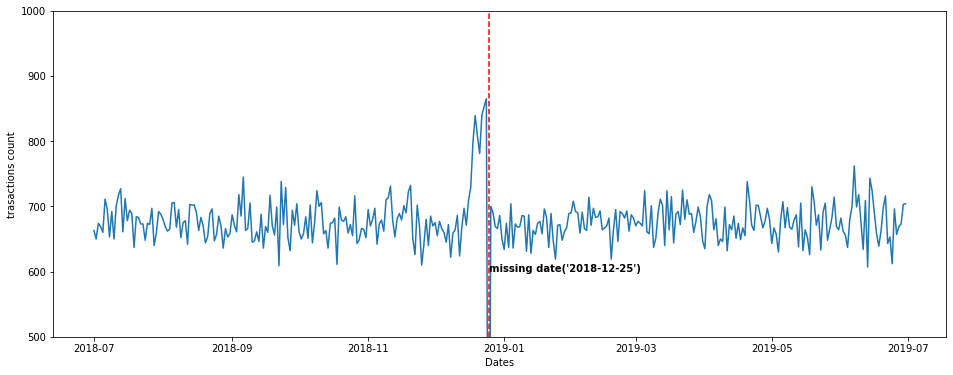

In [275]:
#### Plot transactions over time
fig=plt.figure(figsize=(16,6))
plt.plot(transaction_overtime)
plt.axvline("2018-12-25",linestyle="--",color="r")
plt.text("2018-12-25",600,"missing date('2018-12-25')",weight="bold")
plt.ylim(500,1000)
plt.xlabel("Dates")
plt.ylabel("trasactions count")
plt.show()

We can see that there is an increase in purchases in December and a break in late
December.

* We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.


In [276]:
#### Pack size
cleaned_df["SIZE_PROD"].value_counts().sort_index(ascending=False)

380     6416
330    12540
270     6285
250     3169
220     1564
210     6272
200     4473
190     2995
180     1468
175    66389
170    19983
165    15297
160     2970
150    40203
135     3257
134    25102
125     1454
110    22387
90      3008
70      1507
Name: SIZE_PROD, dtype: int64

The largest size is 380g and the smallest size is 70g - seems sensible!

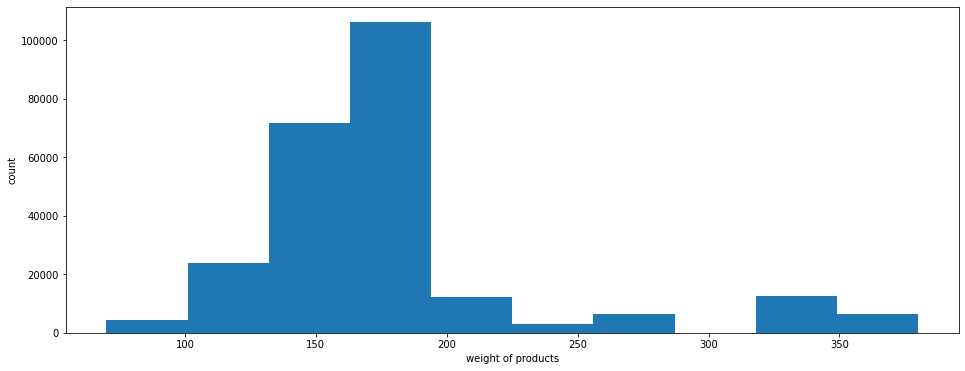

In [277]:
#### Let's plot a histogram of PACK_SIZE 
fig=plt.figure(figsize=(16,6))
plt.hist(cleaned_df["SIZE_PROD"])
plt.xlabel("weight of products")
plt.ylabel("count")
plt.show()

Pack sizes created look reasonable. 

In [278]:
###BRANDS
cleaned_df["BRAND"]=cleaned_df["PROD_NAME"].str.split(' ',n=1,expand=True)[0]

#unique brands
cleaned_df["BRAND"].value_counts()

Kettle        41288
Smiths        27389
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

THERE ARE SOME SUSPICIOUS BRANDS NAME LIKE Red and rrd, dorito and doritos . THey are somehow the same brands

In [279]:
#rename for the consistancy
cleaned_df["BRAND"].replace("Red","RRD",inplace=True)
cleaned_df["BRAND"].replace("Smith","Smiths",inplace=True)
cleaned_df["BRAND"].replace("Ccs","CCS",inplace=True)
cleaned_df["BRAND"].replace("Grain","GrnWves",inplace=True)
cleaned_df["BRAND"].replace("Dorito","Doritos",inplace=True)
cleaned_df["BRAND"].replace("Ww","Woolworths",inplace=True)
cleaned_df["BRAND"].replace("NCC","Natural",inplace=True),
cleaned_df["BRAND"].replace("Infzns","Infuzions",inplace=True)
cleaned_df["BRAND"].replace("Snbts","Sunbites",inplace=True)


cleaned_df["BRAND"].nunique()

21

In [280]:
cleaned_df["BRAND"].value_counts()

Kettle        41288
Smiths        30352
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
Woolworths     1516
French         1418
Name: BRAND, dtype: int64

In [281]:
cleaned_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'SIZE_PROD', 'BRAND'],
      dtype='object')

In [282]:
#most bought brands and most gained brand
brands_df=cleaned_df.groupby("BRAND")["TOT_SALES","BRAND"].agg({"TOT_SALES":"sum","BRAND":"count"})

brands_df.sort_values(by="TOT_SALES",ascending=False)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_19188/4267496136.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brands_df=cleaned_df.groupby("BRAND")["TOT_SALES","BRAND"].agg({"TOT_SALES":"sum","BRAND":"count"})


TOT_SALES  BRAND
BRAND                       
Kettle       390239.8  41288
Doritos      226329.9  25224
Smiths       217486.0  30352
Pringles     177655.5  25102
Infuzions     99047.6  14201
Thins         88852.5  14075
RRD           87607.5  16321
Twisties      81522.1   9454
Tostitos      79789.6   9471
Cobs          70569.8   9693
Tyrrells      51647.4   6442
GrnWves       51617.2   7740
Natural       42318.0   7469
Cheezels      40029.9   4603
WW            35889.5  10320
CCs           18078.9   4551
Cheetos       16884.5   2927
Sunbites       9676.4   3008
French         7929.0   1418
Burger         6831.0   1564
Woolworths     5169.6   1516

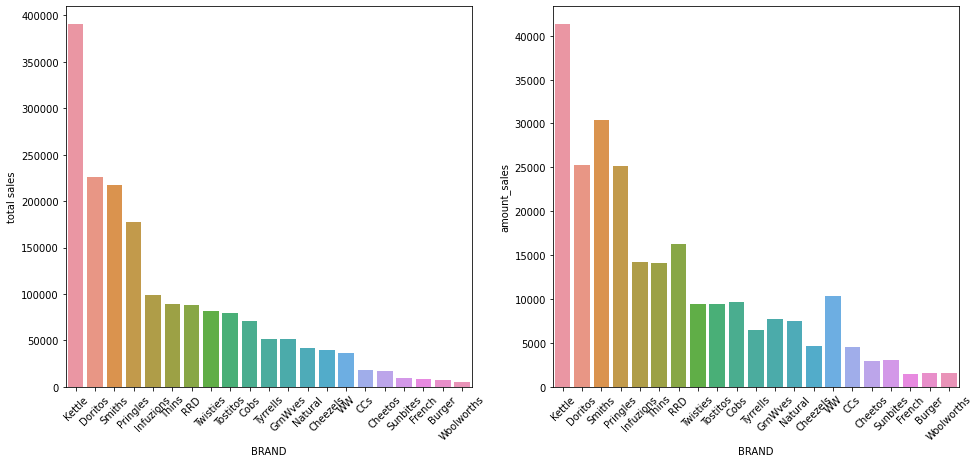

In [283]:
#barplots
data=brands_df.sort_values(by="TOT_SALES",ascending=False)

fig,axes=plt.subplots(1,2,figsize=(16,7))
sns.barplot(x=data.index,y=data["TOT_SALES"],ax=axes[0])
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
axes[0].set_ylabel("total sales")

sns.barplot(x=data.index,y=data["BRAND"],ax=axes[1])
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].set_ylabel("amount_sales")

plt.show()

In [284]:
###Examining customer data
customer_data.isnull().any().any()

False

In [285]:
customer_data.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

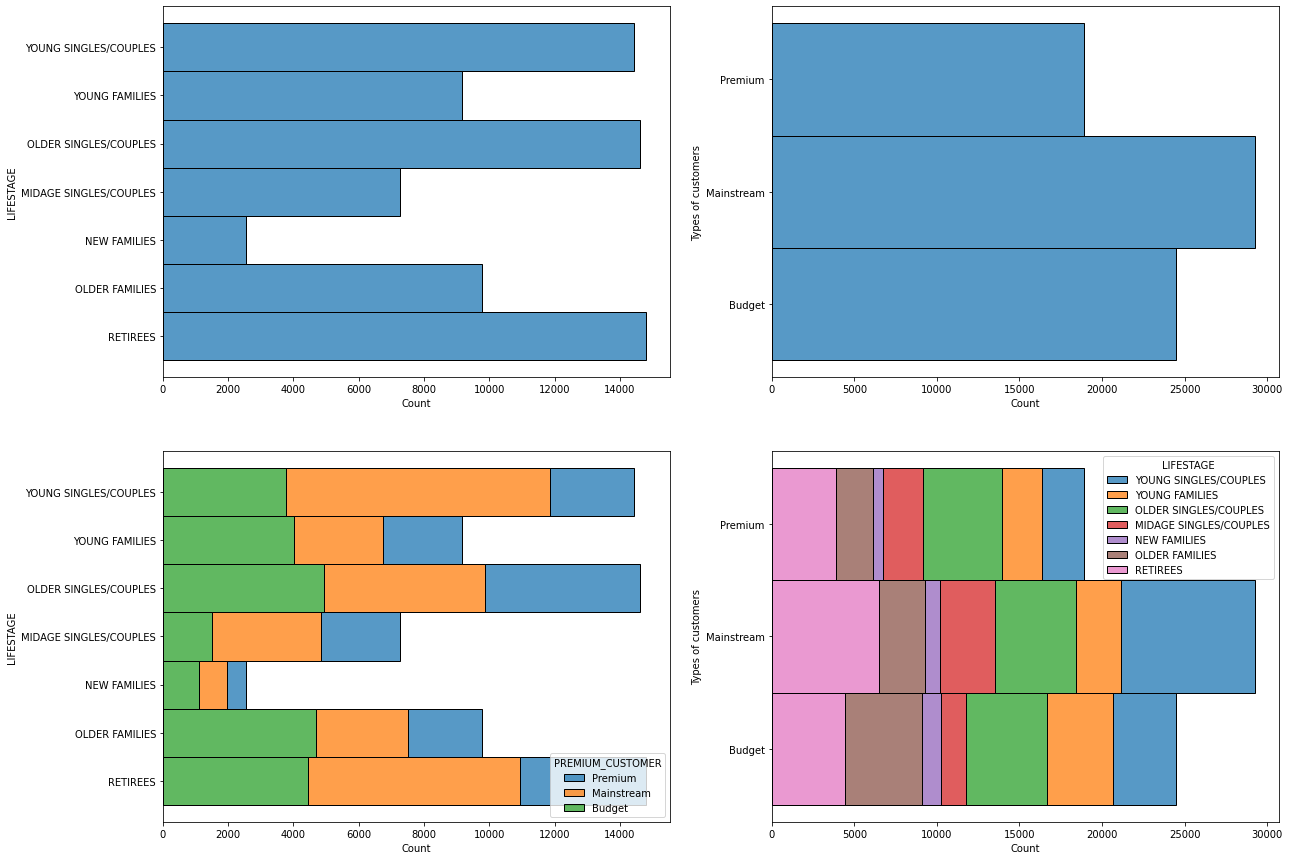

In [286]:
#Distribution of Lifesages and types of customers 
fig,axes=plt.subplots(2,2,figsize=(20,15))
dists=["LIFESTAGE","PREMIUM_CUSTOMER"]
for ax,dist in zip(axes.ravel(),dists):
    sns.histplot(y=customer_data[dist],ax=ax)
sns.histplot(y=customer_data["LIFESTAGE"],hue=customer_data["PREMIUM_CUSTOMER"],multiple="stack",ax=axes[1,0])
sns.histplot(y=customer_data["PREMIUM_CUSTOMER"],hue=customer_data["LIFESTAGE"],multiple="stack",ax=axes[1,1])

axes[0,1].set_ylabel("Types of customers")
axes[1,1].set_ylabel("Types of customers")
plt.show()


From the analysis, we can see most of our customers are retirees and young sigles or couples. On top of that they are also mainstream customers

#### NOW BASIC ANALYSIS IS OVER AND SAVED THE COMBINED DATASETS AS A CSV FILE

In [287]:
all_data.to_csv("combined.csv",index=False)

## Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment


In [288]:
sales=pd.DataFrame(cleaned_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).TOT_SALES.sum())
sales.rename(columns={"TOT_SALES":"total sales"},inplace=True)
sales.sort_values(by="total sales",ascending=False)

#TOTAL SALES FOR EACH GROUP OF CUSTOMERS ARRANGED FROM MOST SOLD TO LEAST SOLD

total sales
LIFESTAGE              PREMIUM_CUSTOMER             
OLDER FAMILIES         Budget              156863.75
YOUNG SINGLES/COUPLES  Mainstream          147582.20
RETIREES               Mainstream          145168.95
YOUNG FAMILIES         Budget              129717.95
OLDER SINGLES/COUPLES  Budget              127833.60
                       Mainstream          124648.50
                       Premium             123531.55
RETIREES               Budget              105916.30
OLDER FAMILIES         Mainstream           96413.55
RETIREES               Premium              91296.65
YOUNG FAMILIES         Mainstream           86338.25
MIDAGE SINGLES/COUPLES Mainstream           84734.25
YOUNG FAMILIES         Premium              78571.70
OLDER FAMILIES         Premium              75242.60
YOUNG SINGLES/COUPLES  Budget               57122.10
MIDAGE SINGLES/COUPLES Premium              54443.85
YOUNG SINGLES/COUPLES  Premium              39052.30
MIDAGE SINGLES/COUPLES Budget               33345.70
NEW FAMILIES           Budget               20607.45
                       Mainstream           15979.70
                       Premium              10760.80

<AxesSubplot:title={'center':'Total Sales By Customer Segments'}, xlabel='LIFESTAGE'>

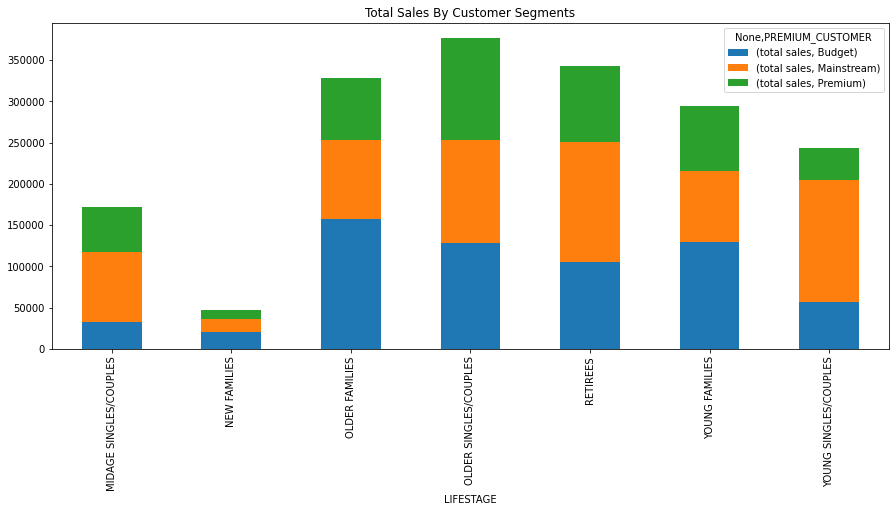

In [289]:
#Visualise
sales.unstack().plot(kind="bar",stacked=True,figsize=(15,6),title="Total Sales By Customer Segments")

* Sales are coming mainly from Budget - older families, Mainstream - young 
singles/couples, and Mainstream - retirees
* Let's see if the higher sales are due to there being more customers who buy chips.

In [290]:
#How many customers are there per customer by segment
num_cus=pd.DataFrame(cleaned_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique())
num_cus.rename(columns={"LYLTY_CARD_NBR":"NUMBER OF Customers"},inplace=True)
num_cus.sort_values(by="NUMBER OF Customers",ascending=False)
#NUMBERS OF CUSTOMERS IN EACH GROUP IN DESCENDING

NUMBER OF Customers
LIFESTAGE              PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES  Mainstream                       7917
RETIREES               Mainstream                       6358
OLDER SINGLES/COUPLES  Mainstream                       4858
                       Budget                           4849
                       Premium                          4682
OLDER FAMILIES         Budget                           4611
RETIREES               Budget                           4385
YOUNG FAMILIES         Budget                           3953
RETIREES               Premium                          3812
YOUNG SINGLES/COUPLES  Budget                           3647
MIDAGE SINGLES/COUPLES Mainstream                       3298
OLDER FAMILIES         Mainstream                       2788
YOUNG FAMILIES         Mainstream                       2685
YOUNG SINGLES/COUPLES  Premium                          2480
YOUNG FAMILIES         Premium                          2398
MIDAGE SINGLES/COUPLES Premium                          2369
OLDER FAMILIES         Premium                          2231
MIDAGE SINGLES/COUPLES Budget                           1474
NEW FAMILIES           Budget                           1087
                       Mainstream                        830
                       Premium                           575

<AxesSubplot:title={'center':'Number of customers'}, xlabel='LIFESTAGE'>

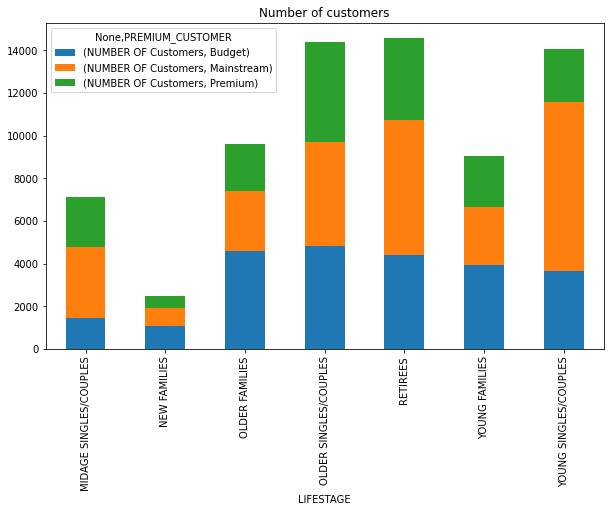

In [291]:
#visualise
num_cus.unstack().plot(kind="bar",stacked=True,figsize=(10,6),title="Number of customers")

* There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but 
this is not a major driver for the Budget - Older families segment.
* Higher sales may also be driven by more units of chips being bought per customer. 
Let's have a look at this next.


In [292]:
#AVERAGE UNIT FOR EACH SEGMENT OF CUSTOMER
#####AVG IS TOTAL QUANTIY SOLD DIVIDED BY UNIQUE COUSTOMERS
avg_chips=pd.DataFrame(cleaned_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).PROD_QTY.sum()/all_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique())
avg_chips.rename(columns={0:"avg_unit_per_customer"},inplace=True)
avg_chips.sort_values(by="avg_unit_per_customer",ascending=False)

#AVERAGE NUMBER OF CHIP PACK SOLD FOR EACH PERSON IN UNIQUE SEGMENT OF CUSTOMERS

avg_unit_per_customer
LIFESTAGE              PREMIUM_CUSTOMER                       
OLDER FAMILIES         Mainstream                     9.114800
                       Budget                         8.952513
                       Premium                        8.900176
YOUNG FAMILIES         Premium                        8.590629
                       Budget                         8.584018
                       Mainstream                     8.502199
OLDER SINGLES/COUPLES  Premium                        6.672211
                       Budget                         6.671333
                       Mainstream                     6.613996
MIDAGE SINGLES/COUPLES Mainstream                     6.351198
RETIREES               Budget                         6.046700
                       Premium                        6.008781
MIDAGE SINGLES/COUPLES Premium                        5.923488
                       Budget                         5.906250
RETIREES               Mainstream                     5.815249
NEW FAMILIES           Mainstream                     4.782097
                       Budget                         4.713129
                       Premium                        4.709184
YOUNG SINGLES/COUPLES  Mainstream                     4.478858
                       Premium                        4.108392
                       Budget                         4.101614

<AxesSubplot:title={'center':'avg unit bought by each type of customer'}, xlabel='LIFESTAGE'>

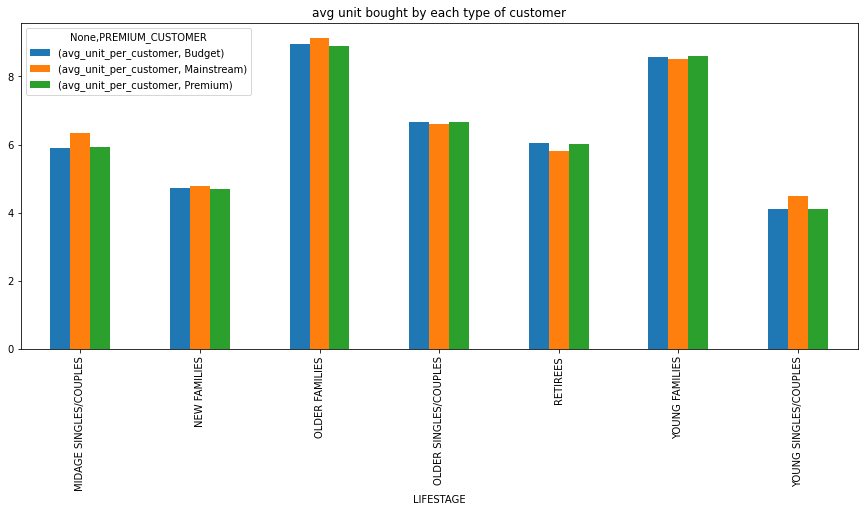

In [293]:
#visualise
avg_chips.unstack().plot(kind="bar",figsize=(15,6),title="avg unit bought by each type of customer")

* Older families and young families in general buy more chips per customer

* Let's also investigate the average price per unit chips bought for each customer 
segment as this is also a driver of total sales.


In [294]:
#AVERAGE PRICE OF CHIPS FOR EACH SEGMENT OF CUSTOMER
#####AVG IS TOTAL PRICE SOLD DIVIDED BY TOTAL QUANTITY SOLD
avg_price=pd.DataFrame(cleaned_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).TOT_SALES.sum()/all_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).PROD_QTY.sum())
avg_price.rename(columns={0:"avg_chip_price_per_customer"},inplace=True)
avg_price.sort_values(by="avg_chip_price_per_customer",ascending=False)

#AVERAGE CHIP PRICE PER PERSON FOR EACH GROUP OF CUSTOMER

avg_chip_price_per_customer
LIFESTAGE              PREMIUM_CUSTOMER                             
YOUNG SINGLES/COUPLES  Mainstream                           3.820206
MIDAGE SINGLES/COUPLES Mainstream                           3.732951
NEW FAMILIES           Mainstream                           3.699861
                       Budget                               3.699058
RETIREES               Budget                               3.682252
                       Premium                              3.668890
NEW FAMILIES           Premium                              3.639094
OLDER SINGLES/COUPLES  Premium                              3.634991
                       Budget                               3.629574
RETIREES               Mainstream                           3.582826
OLDER SINGLES/COUPLES  Mainstream                           3.561691
MIDAGE SINGLES/COUPLES Budget                               3.511552
YOUNG FAMILIES         Premium                              3.506726
MIDAGE SINGLES/COUPLES Premium                              3.506624
YOUNG FAMILIES         Budget                               3.495404
OLDER FAMILIES         Budget                               3.480833
                       Mainstream                           3.473611
YOUNG FAMILIES         Mainstream                           3.447462
YOUNG SINGLES/COUPLES  Premium                              3.446501
                       Budget                               3.426435
OLDER FAMILIES         Premium                              3.393740

<AxesSubplot:title={'center':'avg_chip_price_per_each_customer'}, xlabel='LIFESTAGE'>

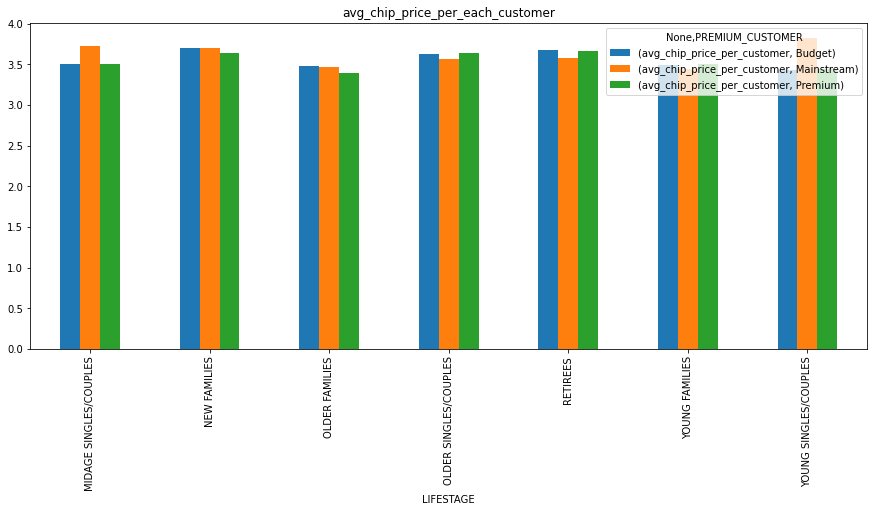

In [295]:
avg_price.unstack().plot(kind="bar",figsize=(15,6),title="avg_chip_price_per_each_customer")

* ONE STRANGE THING IS THAT THE AVERAGE PRICE FOR MAINSTREAM CUSTOMER WERE SLIGHLY HIGHER THAN THE REST TYPE

* Mainstream midage and young singles and couples are more willing to pay more per 
packet of chips compared to their budget and premium counterparts. This may be due 
to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and 
couples buying chips compared to their mainstream counterparts.

In [296]:
#As the average price difference is not too large 
#### Perform an independent t-test between mainstream vs premium and budget midage 
### and
#### young singles and couples


#Create a new dataframe
Priceperunit_df=cleaned_df.copy()

Priceperunit_df["Price_per_unit"]=Priceperunit_df["TOT_SALES"]/Priceperunit_df["PROD_QTY"]


#first 10 rows
Priceperunit_df.head(10)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2018-09-16          1            1002       2        58   
2 2019-03-07          1            1003       3        52   
3 2019-03-08          1            1003       4       106   
4 2018-11-02          1            1004       5        96   
5 2018-12-28          1            1005       6        86   
6 2018-12-04          1            1007       7        49   
7 2018-12-05          1            1007       8        10   
8 2018-11-20          1            1009       9        20   
9 2018-09-09          1            1010      10        51   

                               PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt          2        6.0   
1     Red Rock Deli Chikn Garlic Aioli           1        2.7   
2     Grain Waves Sour    Cream Chives           1        3.6   
3    Natural ChipCo      Hony Soy Chckn          1        3.0   
4            WW Original Stacked Chips           1        1.9   
5                        Cheetos Puffs           1        2.8   
6  Infuzions SourCream Herbs Veg Strws           1        3.8   
7       RRD SR Slow Rst     Pork Belly           1        2.7   
8          Doritos Cheese      Supreme           1        5.7   
9                  Doritos Mexicana              2        8.8   

                LIFESTAGE PREMIUM_CUSTOMER  SIZE_PROD      BRAND  \
0   YOUNG SINGLES/COUPLES          Premium        175    Natural   
1   YOUNG SINGLES/COUPLES       Mainstream        150        RRD   
2          YOUNG FAMILIES           Budget        210    GrnWves   
3          YOUNG FAMILIES           Budget        175    Natural   
4   OLDER SINGLES/COUPLES       Mainstream        160         WW   
5  MIDAGE SINGLES/COUPLES       Mainstream        165    Cheetos   
6   YOUNG SINGLES/COUPLES           Budget        110  Infuzions   
7   YOUNG SINGLES/COUPLES           Budget        150        RRD   
8            NEW FAMILIES          Premium        330    Doritos   
9   YOUNG SINGLES/COUPLES       Mainstream        170    Doritos   

   Price_per_unit  
0             3.0  
1             2.7  
2             3.6  
3             3.0  
4             1.9  
5             2.8  
6             3.8  
7             2.7  
8             5.7  
9             4.4

In [297]:
# Let's group into young mainstrem and non_maninstrem

young_main_stream=Priceperunit_df[(Priceperunit_df["PREMIUM_CUSTOMER"]=="Mainstream") & (Priceperunit_df["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
young_non_main_stream=Priceperunit_df[(Priceperunit_df["PREMIUM_CUSTOMER"]!="Mainstream") & (Priceperunit_df["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]

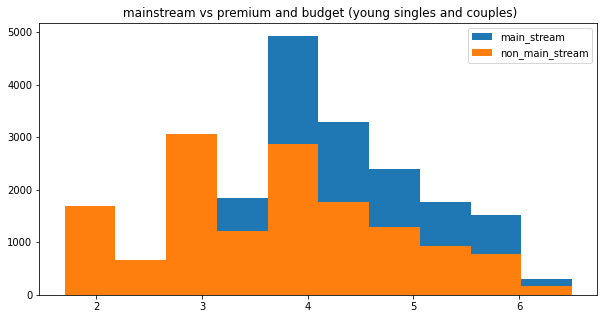

In [298]:
#visualise it to differentiate statistically
fig=plt.figure(figsize=(10,5))
plt.hist(young_main_stream["Price_per_unit"],label="main_stream")
plt.hist(young_non_main_stream["Price_per_unit"],label="non_main_stream")
plt.legend()
plt.title(" mainstream vs premium and budget (young singles and couples)")
plt.show()

In [299]:
### Let's take a look at their mean
[np.mean(young_main_stream["Price_per_unit"]),np.mean(young_non_main_stream["Price_per_unit"])]

[4.065641629144494, 3.660630849220104]

* The average price of mian stream customers were higher than premium and budget customers

In [300]:
### Perfome t-test
ttest_ind(young_main_stream["Price_per_unit"],young_non_main_stream["Price_per_unit"])

### Mainstream price per unit is significantly higher than non-mainstream

Ttest_indResult(statistic=35.33923272407975, pvalue=1.0984949314620195e-268)

In [301]:
# Let's group into midage mainstrem and non_maninstrem

midage_main_stream=Priceperunit_df[(Priceperunit_df["PREMIUM_CUSTOMER"]=="Mainstream") & (Priceperunit_df["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")]
midage_non_main_stream=Priceperunit_df[(Priceperunit_df["PREMIUM_CUSTOMER"]!="Mainstream") & (Priceperunit_df["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")]

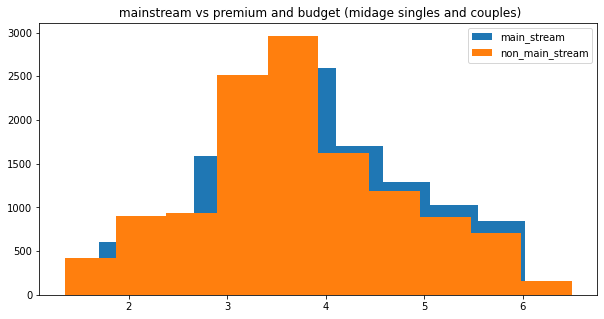

In [302]:
#visualise
#visualise it to differentiate statistically
fig=plt.figure(figsize=(10,5))
plt.hist(midage_main_stream["Price_per_unit"],label="main_stream")
plt.hist(midage_non_main_stream["Price_per_unit"],label="non_main_stream")
plt.legend()
plt.title(" mainstream vs premium and budget (midage singles and couples)")
plt.show()

In [303]:
#average price
[np.mean(midage_main_stream["Price_per_unit"]),np.mean(midage_non_main_stream["Price_per_unit"])]

[3.994240648940964, 3.7602617247825734]

In [304]:
###Perfome ttest
ttest_ind(midage_main_stream["Price_per_unit"],midage_non_main_stream["Price_per_unit"])

Ttest_indResult(statistic=16.814983102714304, pvalue=4.4499299588142955e-63)

The t-test results in a p-value of 7.604148906118057e-307 and 2.1727719935755616e-76, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than 
that of budget or premium, young and midage singles and couples.

In [305]:
## Deep dive into specific customer segments for insights
# We have found quite a few interesting insights that we can dive deeper into. 
# We might want to target customer segments that contribute the most to sales to 
# retain them or further increase sales. Let's look at Mainstream - young 
# singles/couples. For instance, let's find out if they tend to buy a particular 
# brand of chips.


### Deep dive into Mainstream, young singles/couples

filter1=(cleaned_df["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(cleaned_df["PREMIUM_CUSTOMER"]=="Mainstream")
filter2=(cleaned_df["LIFESTAGE"]!="YOUNG SINGLES/COUPLES")&(cleaned_df["PREMIUM_CUSTOMER"]!="Mainstream")

target=cleaned_df[filter1]
non_target=cleaned_df[filter2]

In [306]:
#Affirnity to brand
###target(Young mainstream singles or couples)
target_brand=target.loc[:,["BRAND","PROD_QTY"]]
target_brand_sum=target["PROD_QTY"].sum()
target_brand["affirnity_to_brand"]=target_brand["PROD_QTY"]/target_brand_sum


###non_target(non-Young mainstream singles or couples)
non_target_brand=non_target.loc[:,["BRAND","PROD_QTY"]]
non_target_brand_sum=non_target["PROD_QTY"].sum()
non_target_brand["affirnity_to_brand"]=non_target_brand["PROD_QTY"]/non_target_brand_sum
# non_target_brand=non_target_brand.groupby("BRAND")["affirnity_to_brand"].sum()



#group by Brand
target_brand=pd.DataFrame(target_brand.groupby("BRAND")["affirnity_to_brand"].sum())
non_target_brand=pd.DataFrame(non_target_brand.groupby("BRAND")["affirnity_to_brand"].sum())


In [307]:
#merge two datasets
brand_affirnity_df=pd.merge(target_brand,non_target_brand,right_on="BRAND",left_on="BRAND",suffixes=["_target","_non_target"])

#creat new column by dividing target affirnity with non_target affirnity
brand_affirnity_df["Affirnity_to_brand"]=brand_affirnity_df["affirnity_to_brand_target"]/brand_affirnity_df["affirnity_to_brand_non_target"]
brand_affirnity_df.sort_values(by="Affirnity_to_brand",ascending=False)

affirnity_to_brand_target  affirnity_to_brand_non_target  \
BRAND                                                                  
Tyrrells                     0.031553                       0.025715   
Twisties                     0.046184                       0.037933   
Doritos                      0.122761                       0.101172   
Kettle                       0.197985                       0.166562   
Tostitos                     0.045411                       0.038351   
Pringles                     0.119420                       0.101111   
Cobs                         0.044638                       0.038449   
Infuzions                    0.064679                       0.057410   
Thins                        0.060373                       0.057160   
GrnWves                      0.032712                       0.031069   
Cheezels                     0.017971                       0.018904   
Smiths                       0.096370                       0.124212   
French                       0.003948                       0.005707   
Cheetos                      0.008033                       0.011759   
RRD                          0.043810                       0.067185   
Natural                      0.019600                       0.030959   
CCs                          0.011180                       0.018445   
Sunbites                     0.006349                       0.012613   
WW                           0.021256                       0.042657   
Woolworths                   0.002843                       0.006090   
Burger                       0.002926                       0.006538   

            Affirnity_to_brand  
BRAND                           
Tyrrells              1.227016  
Twisties              1.217496  
Doritos               1.213388  
Kettle                1.188658  
Tostitos              1.184091  
Pringles              1.181081  
Cobs                  1.160950  
Infuzions             1.126613  
Thins                 1.056209  
GrnWves               1.052887  
Cheezels              0.950646  
Smiths                0.775852  
French                0.691719  
Cheetos               0.683145  
RRD                   0.652076  
Natural               0.633086  
CCs                   0.606137  
Sunbites              0.503394  
WW                    0.498297  
Woolworths            0.466878  
Burger                0.447571

* YOUNG MAINSTREAM COUPLES OR SINGLES CUSTOMER ARE MORE LIKELY TO BUY CHIPS FROM ["Tyrrells","Twisties","Doritos" AND ETC....] COMPARED TO OTHERS CUSTOMERS

In [308]:
# Affirnity to pack size
target_size=target.loc[:,["SIZE_PROD","PROD_QTY"]]
target_sum=target["PROD_QTY"].sum()
target_size["affirnity_to_size"]=target_size["PROD_QTY"]/target_sum
target_size=pd.DataFrame(target_size.groupby("SIZE_PROD")["affirnity_to_size"].sum())

non_target_size=non_target.loc[:,["SIZE_PROD","PROD_QTY"]]
non_target_sum=non_target["PROD_QTY"].sum()
non_target_size["affirnity_to_size"]=non_target_size["PROD_QTY"]/non_target_sum
non_target_size=pd.DataFrame(non_target_size.groupby("SIZE_PROD")["affirnity_to_size"].sum())

In [309]:
#merge two datasets
affirnity_size_df=pd.merge(target_size,non_target_size,left_index=True,right_index=True,suffixes=["_target","_non_target"])
affirnity_size_df["Affirnity_to_size"]=affirnity_size_df["affirnity_to_size_target"]/affirnity_size_df["affirnity_to_size_non_target"]
affirnity_size_df.sort_values(by="Affirnity_to_size",ascending=False)

affirnity_to_size_target  affirnity_to_size_non_target  \
SIZE_PROD                                                           
270                        0.031829                      0.025070   
380                        0.032160                      0.025711   
330                        0.061284                      0.050975   
110                        0.106280                      0.089576   
134                        0.119420                      0.101111   
210                        0.029124                      0.024892   
135                        0.014769                      0.012932   
250                        0.014355                      0.012863   
170                        0.080773                      0.080348   
150                        0.157598                      0.163071   
175                        0.254990                      0.271452   
165                        0.055652                      0.061588   
190                        0.007481                      0.012131   
180                        0.003589                      0.006177   
160                        0.006404                      0.012222   
125                        0.003009                      0.005976   
90                         0.006349                      0.012613   
200                        0.008972                      0.018471   
70                         0.003037                      0.006284   
220                        0.002926                      0.006538   

           Affirnity_to_size  
SIZE_PROD                     
270                 1.269599  
380                 1.250818  
330                 1.202234  
110                 1.186483  
134                 1.181081  
210                 1.170011  
135                 1.142078  
250                 1.115951  
170                 1.005292  
150                 0.966441  
175                 0.939355  
165                 0.903622  
190                 0.616692  
180                 0.580939  
160                 0.524009  
125                 0.503486  
90                  0.503394  
200                 0.485707  
70                  0.483252  
220                 0.447571

* It seemed like mainstream young singles/couples are likely to purchase a 270g pack size chips compared to others

In [310]:
#Let's have a look what kind of brand offer a 270g pack most
size_brand_df=cleaned_df[cleaned_df["SIZE_PROD"]==270]
size_brand_df

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
64     2019-04-01          1            1060      68        15   
123    2018-08-26          1            1114     130       113   
284    2019-06-09          1            1262     297        15   
301    2018-11-30          1            1278     315       113   
311    2018-09-24          1            1287     325        15   
...           ...        ...             ...     ...       ...   
264546 2019-02-19        272          272223  269956       113   
264579 2019-01-29        272          272248  269993       113   
264612 2018-07-13        272          272277  270026        15   
264713 2018-09-10        272          272346  270130       113   
264717 2018-10-03        272          272347  270134        15   

                    PROD_NAME  PROD_QTY  TOT_SALES              LIFESTAGE  \
64      Twisties Cheese               1        4.6  YOUNG SINGLES/COUPLES   
123         Twisties Chicken          1        4.6         OLDER FAMILIES   
284     Twisties Cheese               1        4.6               RETIREES   
301         Twisties Chicken          1        4.6           NEW FAMILIES   
311     Twisties Cheese               2        9.2               RETIREES   
...                       ...       ...        ...                    ...   
264546      Twisties Chicken          2        9.2  OLDER SINGLES/COUPLES   
264579      Twisties Chicken          2        9.2  OLDER SINGLES/COUPLES   
264612  Twisties Cheese               2        9.2           NEW FAMILIES   
264713      Twisties Chicken          2        9.2               RETIREES   
264717  Twisties Cheese               2        9.2  YOUNG SINGLES/COUPLES   

       PREMIUM_CUSTOMER  SIZE_PROD     BRAND  
64           Mainstream        270  Twisties  
123             Premium        270  Twisties  
284             Premium        270  Twisties  
301          Mainstream        270  Twisties  
311          Mainstream        270  Twisties  
...                 ...        ...       ...  
264546           Budget        270  Twisties  
264579       Mainstream        270  Twisties  
264612           Budget        270  Twisties  
264713          Premium        270  Twisties  
264717       Mainstream        270  Twisties  

[6285 rows x 12 columns]

* We can see even from now that twisties offer 270g pack most

In [311]:
#let's act more details
size_brand_df.BRAND.value_counts()

Twisties    6285
Name: BRAND, dtype: int64

In [312]:
# let's also have a look at the amount of mainstream young singles couples growth throught out time
time_df=target.loc[:,["DATE","PREMIUM_CUSTOMER","LIFESTAGE"]]
#combine lifestage and types of customer
time_df["Type_cus"]=time_df["PREMIUM_CUSTOMER"]+'  '+time_df["LIFESTAGE"]

time_df_groups=pd.DataFrame(time_df.groupby(["DATE","Type_cus"])["Type_cus"].count())
time_df_groups.sort_values(by="DATE",ascending=True)


Type_cus
DATE       Type_cus                                   
2018-07-01 Mainstream  YOUNG SINGLES/COUPLES        43
2018-07-02 Mainstream  YOUNG SINGLES/COUPLES        48
2018-07-03 Mainstream  YOUNG SINGLES/COUPLES        41
2018-07-04 Mainstream  YOUNG SINGLES/COUPLES        51
2018-07-05 Mainstream  YOUNG SINGLES/COUPLES        44
...                                                ...
2019-06-26 Mainstream  YOUNG SINGLES/COUPLES        59
2019-06-27 Mainstream  YOUNG SINGLES/COUPLES        57
2019-06-28 Mainstream  YOUNG SINGLES/COUPLES        60
2019-06-29 Mainstream  YOUNG SINGLES/COUPLES        72
2019-06-30 Mainstream  YOUNG SINGLES/COUPLES        69

[364 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

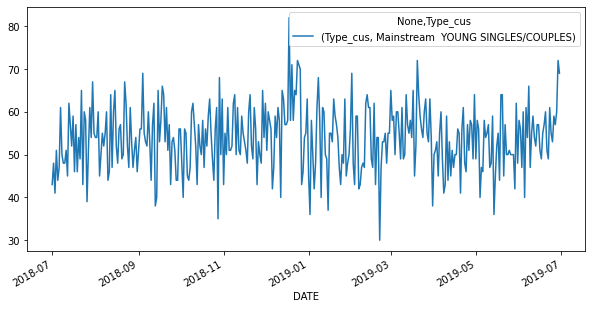

In [313]:
#visualise
time_df_groups.unstack().plot(figsize=(10,5))


* The number of mainstream young singles/couples customers grow overtime flatuately.

* This explained why Twisties was purchased mostly bought by mainstream young singles/couples customers

# INSIGHTS
## Conclusion
* Sales are high for old budget familes, mainstream young singles/couples  and mainstream retirees
* On top of that, higher in sales for mainstream young singles/couples  and mainstream retirees is due to the facts that there are more customers in these segments
* (Main stream young singles/couples) bought more pack per person
* In addition, they prefer chips from Twisties due to its 270g package 

## Recommendation
* Sales manager should concentrate more on twisties brands for mainstream young singles or couples 
since they are the majority of the customers